In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('new-data/20240723_003405_result.csv')
df2 = pd.read_csv('new-data/20240723_043521_result.csv')
df3 = pd.read_csv('new-data/20240723_185910_result.csv')
df4 = pd.read_csv('new-data/20240724_172157_result.csv')

In [3]:
df1['TIMESTAMP'] -= 80295
df2['TIMESTAMP'] -= 95653
df3['TIMESTAMP'] -= 146505
df4['TIMESTAMP'] -= 227144

In [4]:
df1['DATE_TIME'] = pd.to_datetime(df1['TIMESTAMP'], unit='s')
df2['DATE_TIME'] = pd.to_datetime(df2['TIMESTAMP'], unit='s')
df3['DATE_TIME'] = pd.to_datetime(df3['TIMESTAMP'], unit='s')
df4['DATE_TIME'] = pd.to_datetime(df1['TIMESTAMP'], unit='s')

In [5]:
df1, df2, df3, df4

(         TIMESTAMP                                                URI METHOD  \
 0     1.721606e+09  /connections/create-invitation?alias=holder-ac...   POST   
 1     1.721606e+09  /connections/create-invitation?alias=holder-ac...   POST   
 2     1.721606e+09  /connections/create-invitation?alias=holder-ac...   POST   
 3     1.721606e+09  /connections/create-invitation?alias=holder-ac...   POST   
 4     1.721606e+09  /connections/create-invitation?alias=holder-ac...   POST   
 ...            ...                                                ...    ...   
 4061  1.721615e+09  /connections/create-invitation?alias=holder-ac...   POST   
 4062  1.721615e+09  /connections/create-invitation?alias=holder-ac...   POST   
 4063  1.721615e+09  /connections/create-invitation?alias=holder-ac...   POST   
 4064  1.721615e+09  /connections/create-invitation?alias=holder-ac...   POST   
 4065  1.721615e+09  /connections/create-invitation?alias=holder-ac...   POST   
 
           REMOTE IP  STAT

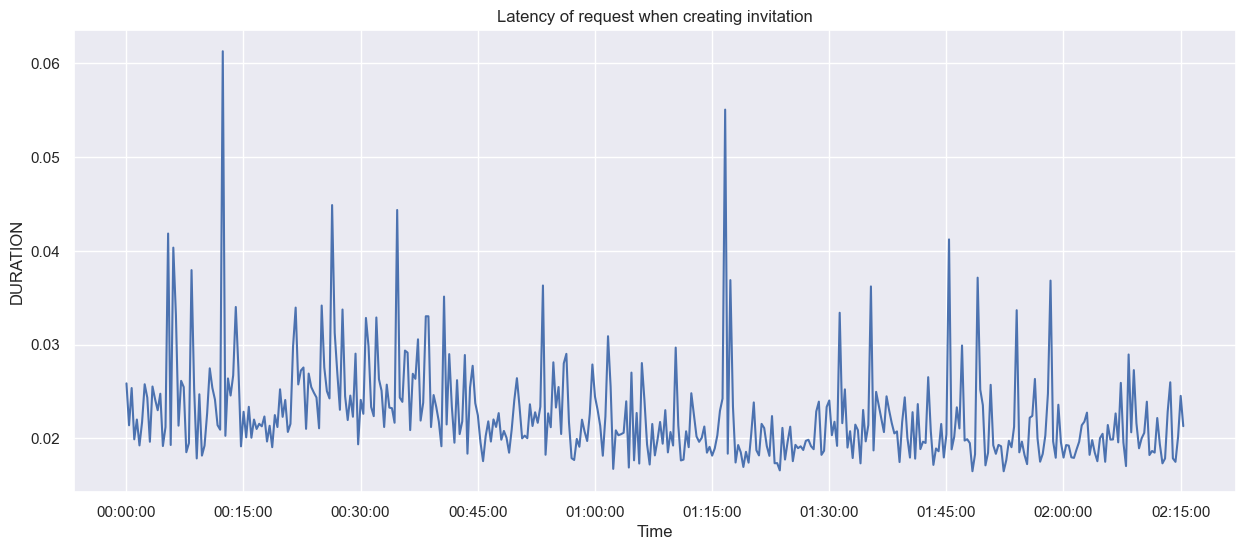

In [6]:
from matplotlib.dates import DateFormatter

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df1.loc[::10], x='DATE_TIME', y='DURATION')
plot.set_title('Latency of request when creating invitation')
plot.set_xlabel('Time')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_23006/1477453058.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')


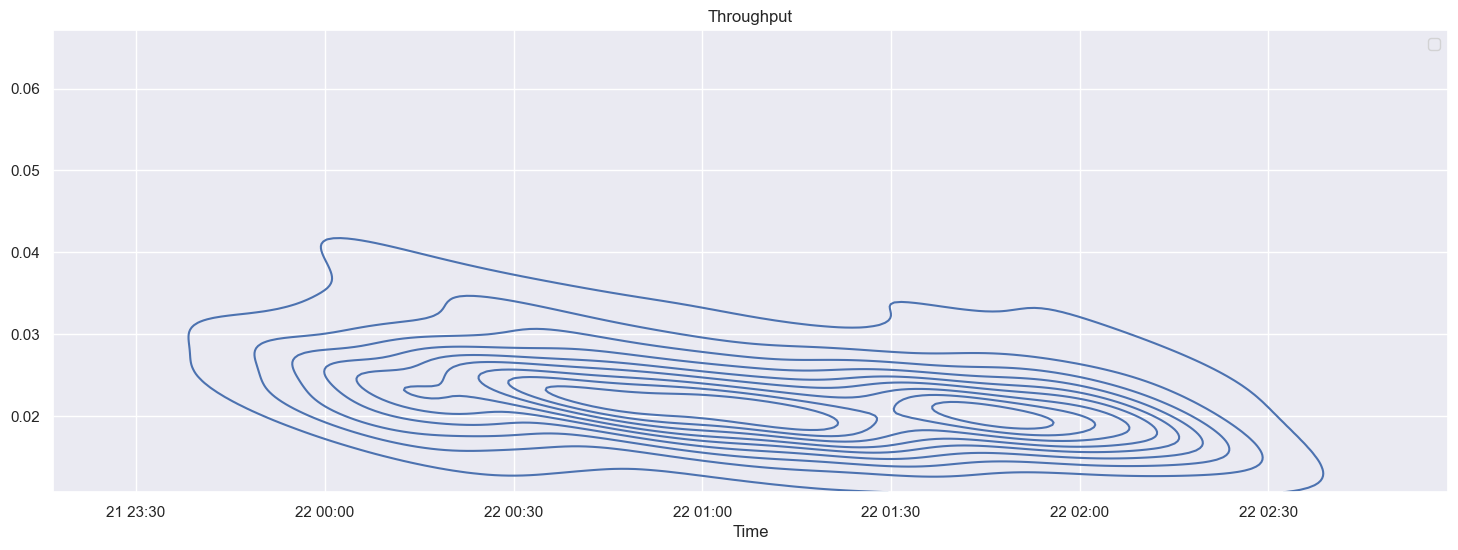

In [7]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=df1.loc[::10], x='DATE_TIME', y='DURATION')
_ = plot.legend(title='')
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
# _ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')

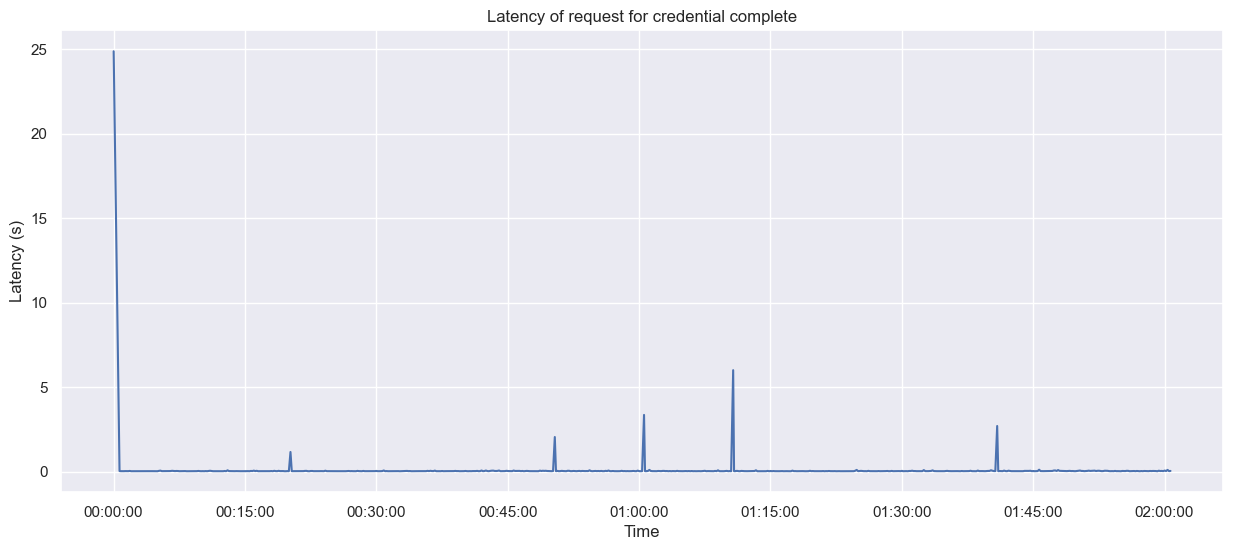

In [8]:
sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df2.loc[::5], x='DATE_TIME', y='DURATION')
plot.set_title('Latency of request for credential complete')
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

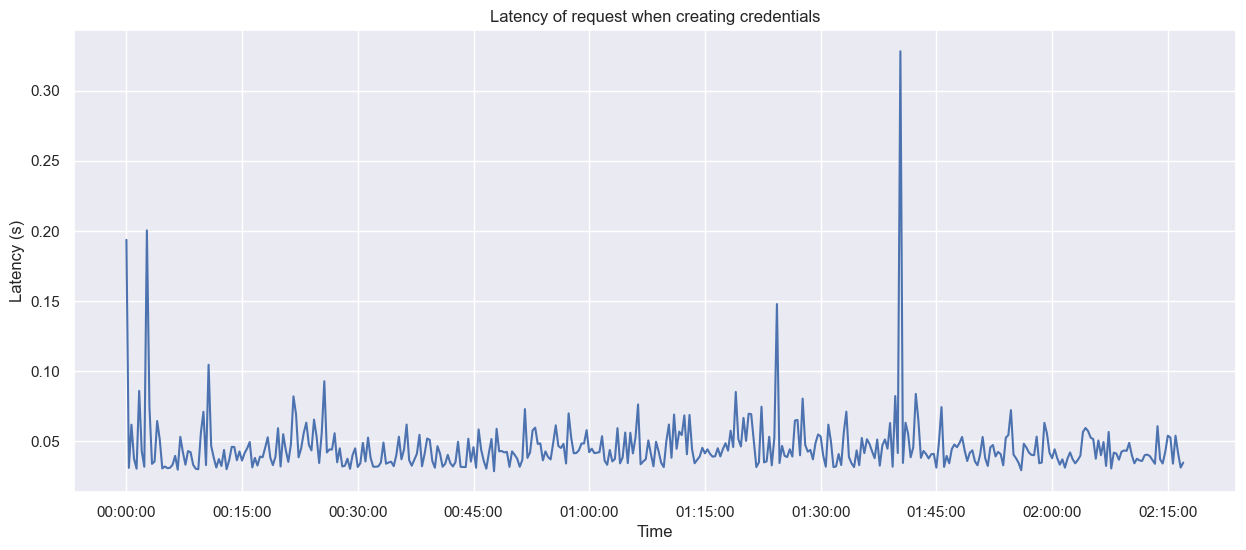

In [10]:
sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df3.loc[::10], x='DATE_TIME', y='DURATION')
plot.set_title('Latency of request when creating credentials')
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

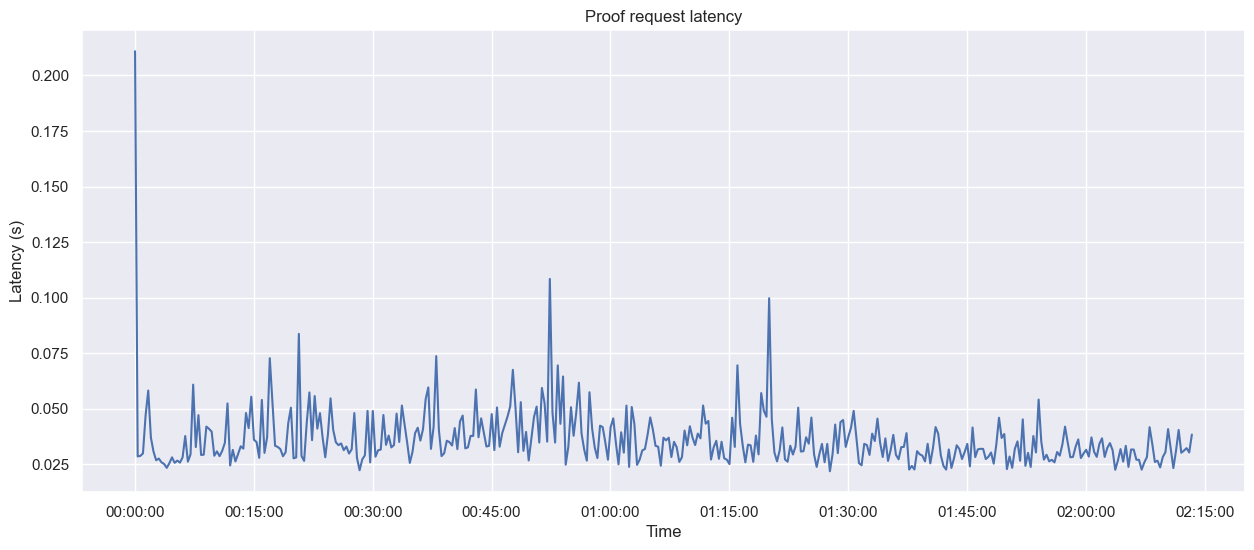

In [12]:
sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df4.loc[::10], x='DATE_TIME', y='DURATION')
plot.set_title("Proof request latency")
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

In [14]:
df5 = pd.read_csv('new-data/loki_data_Number_of_iterations_Started.csv')
df5.loc[::6,'cum_sum'] = df5.loc[::6, 'value'].cumsum()
df5.loc[::6,'timestamp'] = pd.to_datetime(df5.loc[::6, 'timestamp']).sub(pd.Timedelta(hours=16))

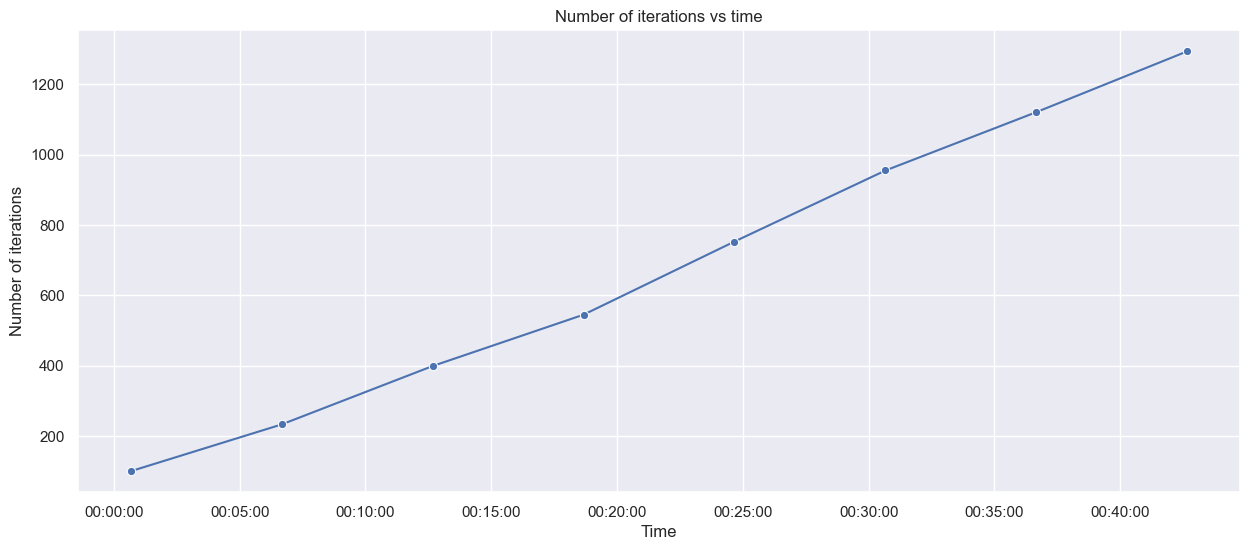

In [15]:
sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df5.loc[::6], x='timestamp', y='cum_sum', marker='o')
plot.set_title("Number of iterations vs time")
plot.set_xlabel('Time')
plot.set_ylabel('Number of iterations')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

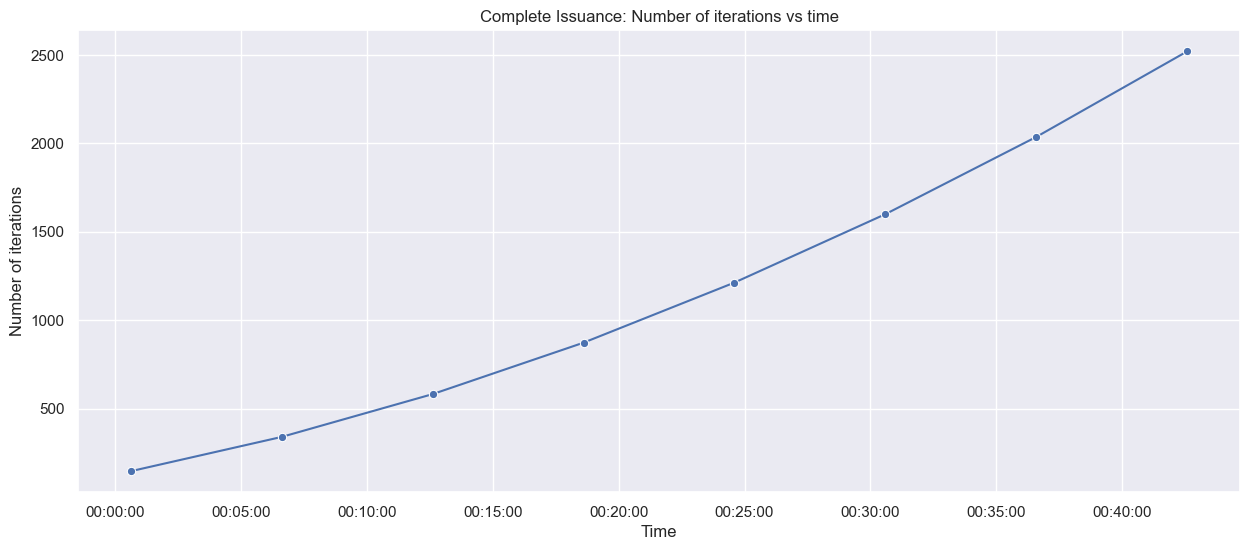

In [16]:
df6 = pd.read_csv('Complete Issuance/loki_data_Number_of_Iterations_Started.csv')
df6.loc[::6,'cum_sum'] = df6.loc[::6, 'value'].cumsum()
df6.loc[::6,'timestamp'] = pd.to_datetime(df6.loc[::6, 'timestamp']).sub(pd.Timedelta(hours=19.2))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df6.loc[::6], x='timestamp', y='cum_sum', marker='o')
plot.set_title("Complete Issuance: Number of iterations vs time")
plot.set_xlabel('Time')
plot.set_ylabel('Number of iterations')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

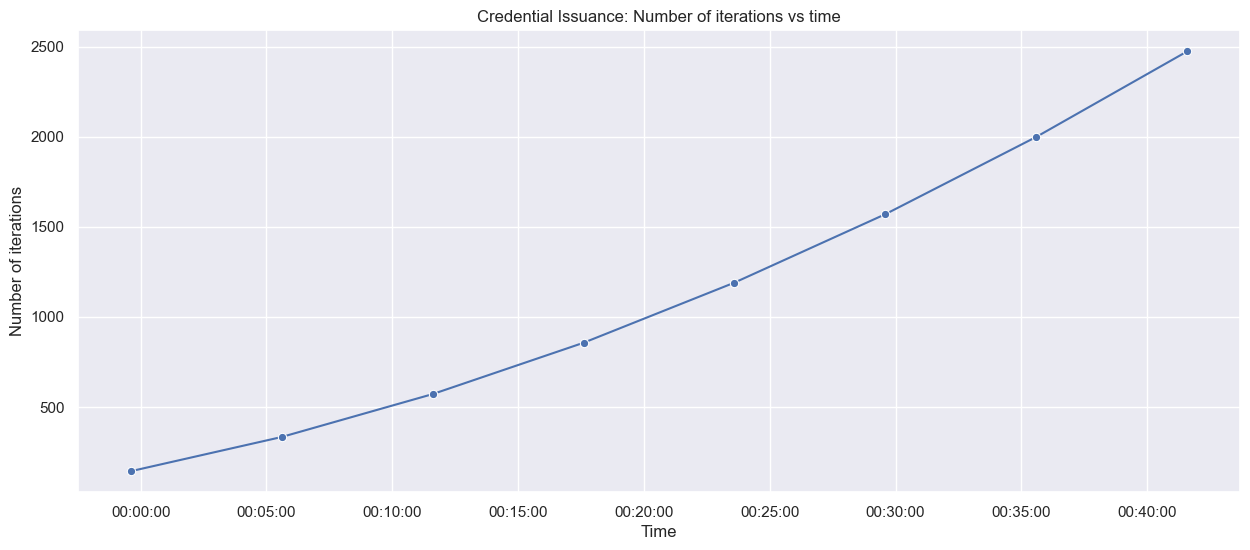

In [17]:
df7 = pd.read_csv('Credential Issuance/loki_data_Number_of_Iterations_Started.csv')
df7.loc[::6,'cum_sum'] = df7.loc[::6, 'value'].cumsum()
df7.loc[::6,'timestamp'] = pd.to_datetime(df7.loc[::6, 'timestamp']).sub(pd.Timedelta(hours=17.5))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df7.loc[::6], x='timestamp', y='cum_sum', marker='o')
plot.set_title("Credential Issuance: Number of iterations vs time")
plot.set_xlabel('Time')
plot.set_ylabel('Number of iterations')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

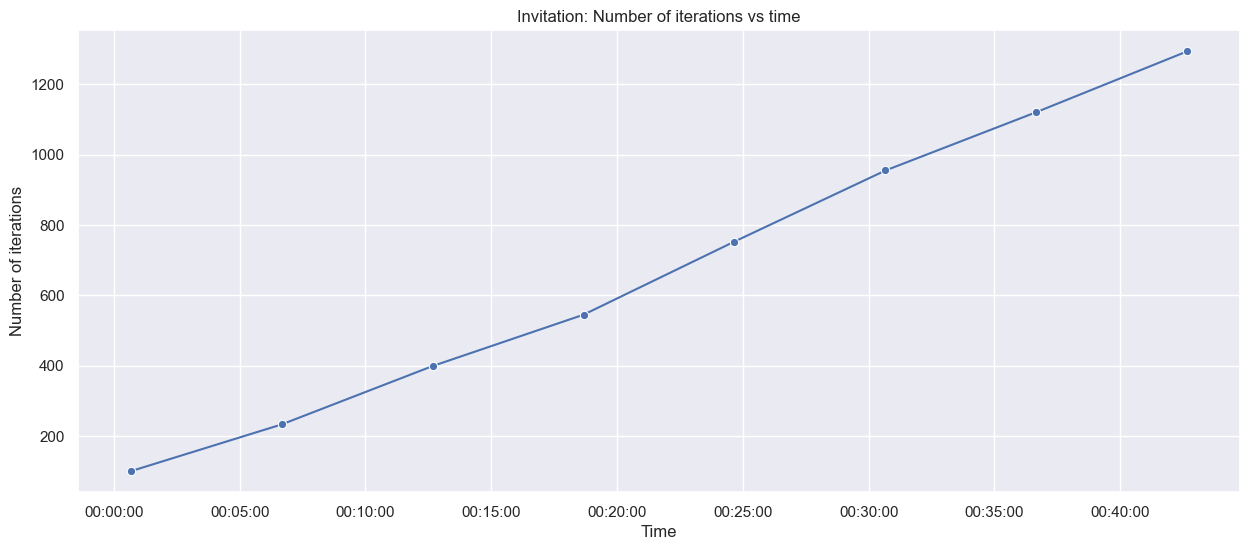

In [18]:
df8 = pd.read_csv('Invitation/loki_data_Number_of_Iterations_Started.csv')
df8.loc[::6,'cum_sum'] = df8.loc[::6, 'value'].cumsum()
df8.loc[::6,'timestamp'] = pd.to_datetime(df8.loc[::6, 'timestamp']).sub(pd.Timedelta(hours=16))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df8.loc[::6], x='timestamp', y='cum_sum', marker='o')
plot.set_title("Invitation: Number of iterations vs time")
plot.set_xlabel('Time')
plot.set_ylabel('Number of iterations')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

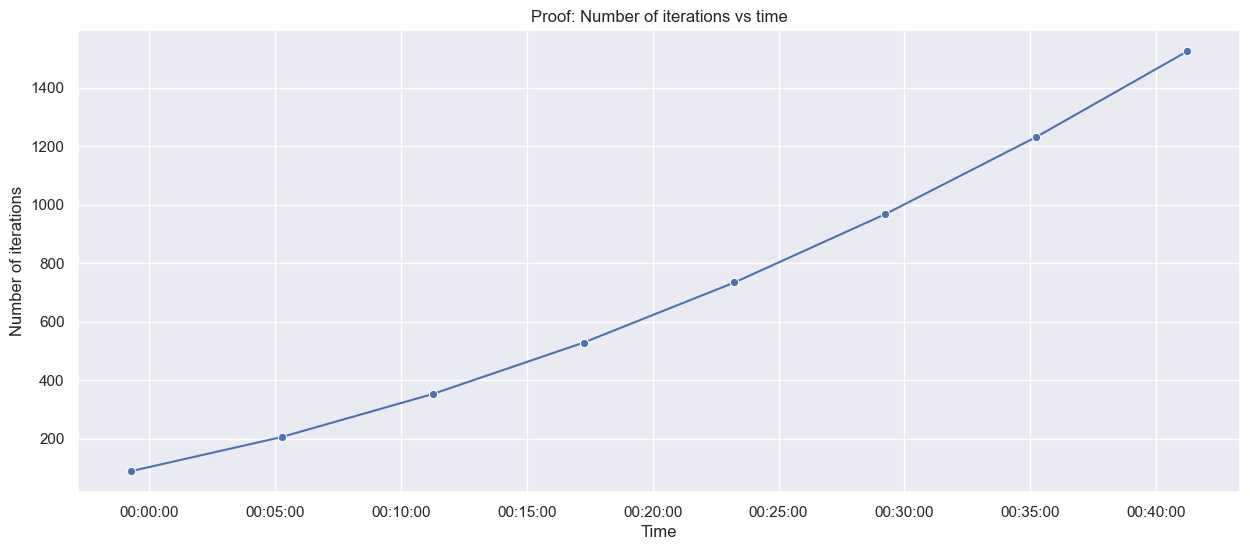

In [19]:
df9 = pd.read_csv('Proof/loki_data_Number_of_Iterations_Started.csv')
df9.loc[::6,'cum_sum'] = df9.loc[::6, 'value'].cumsum()
df9.loc[::6,'timestamp'] = pd.to_datetime(df9.loc[::6, 'timestamp']).sub(pd.Timedelta(hours=21.1))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df9.loc[::6], x='timestamp', y='cum_sum', marker='o')
plot.set_title("Proof: Number of iterations vs time")
plot.set_xlabel('Time')
plot.set_ylabel('Number of iterations')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

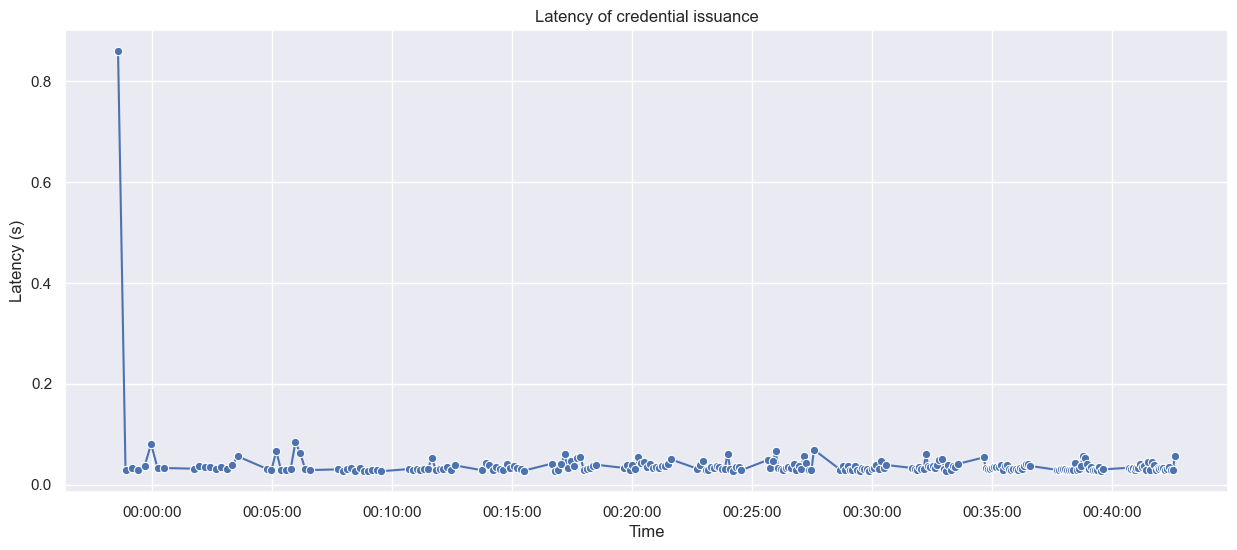

In [20]:
df7 = pd.read_csv('Credential Issuance/20240728_181910_result.csv')
df7['DATE_TIME'] = pd.to_datetime(df7['TIMESTAMP'], unit='s').sub(pd.Timedelta(hours=17.5))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df7.loc[::40], x='DATE_TIME', y='DURATION', marker='o')
plot.set_title('Latency of credential issuance')
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

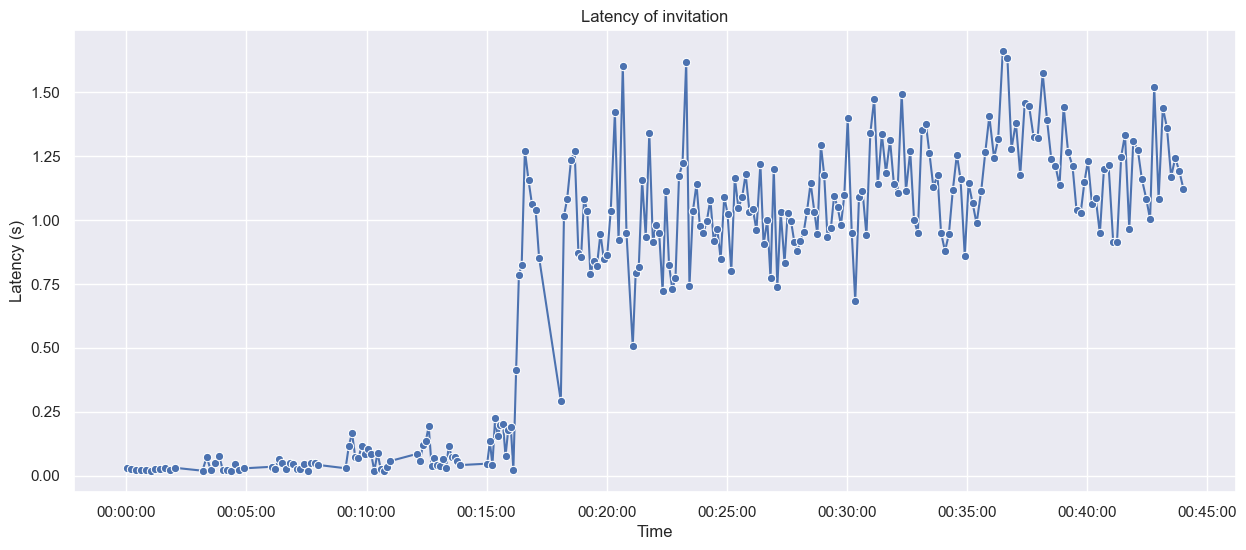

In [22]:
df8 = pd.read_csv('Invitation/20240728_164645_result.csv')
df8['DATE_TIME'] = pd.to_datetime(df8['TIMESTAMP'], unit='s').sub(pd.Timedelta(hours=16))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df8.loc[::30], x='DATE_TIME', y='DURATION', marker='o')
plot.set_title('Latency of invitation')
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_23006/1032753699.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  _ = plot.legend(title='')


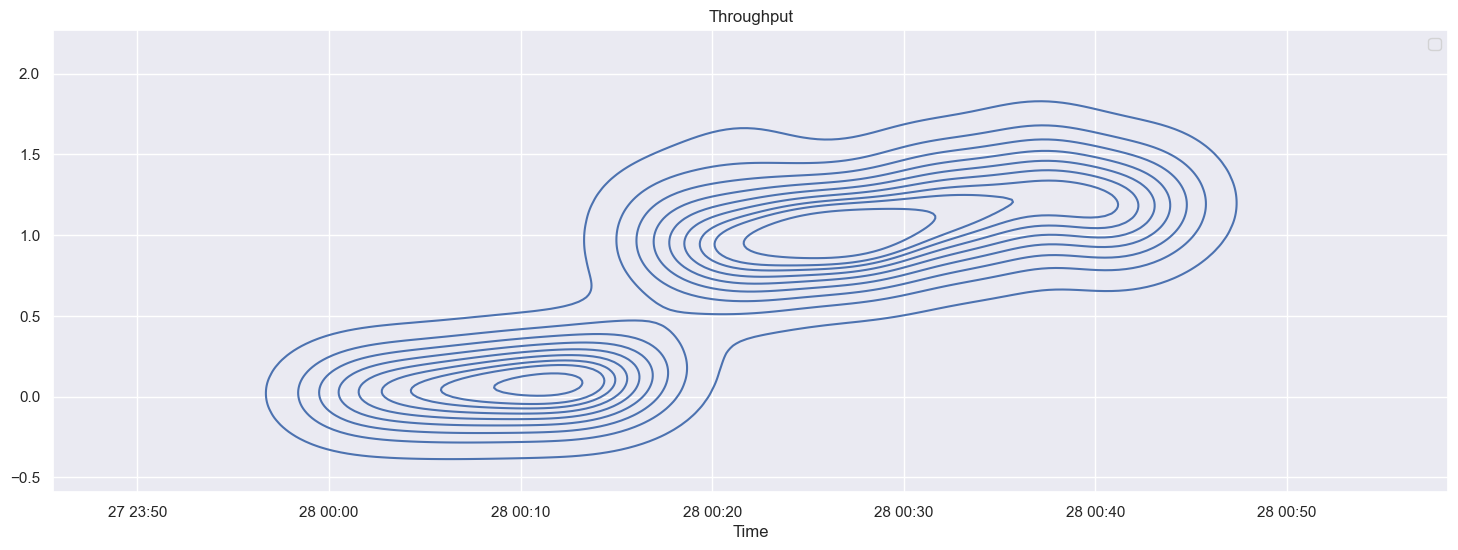

In [23]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.kdeplot(data=df8.loc[::30], x='DATE_TIME', y='DURATION')
_ = plot.legend(title='')
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
# _ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')

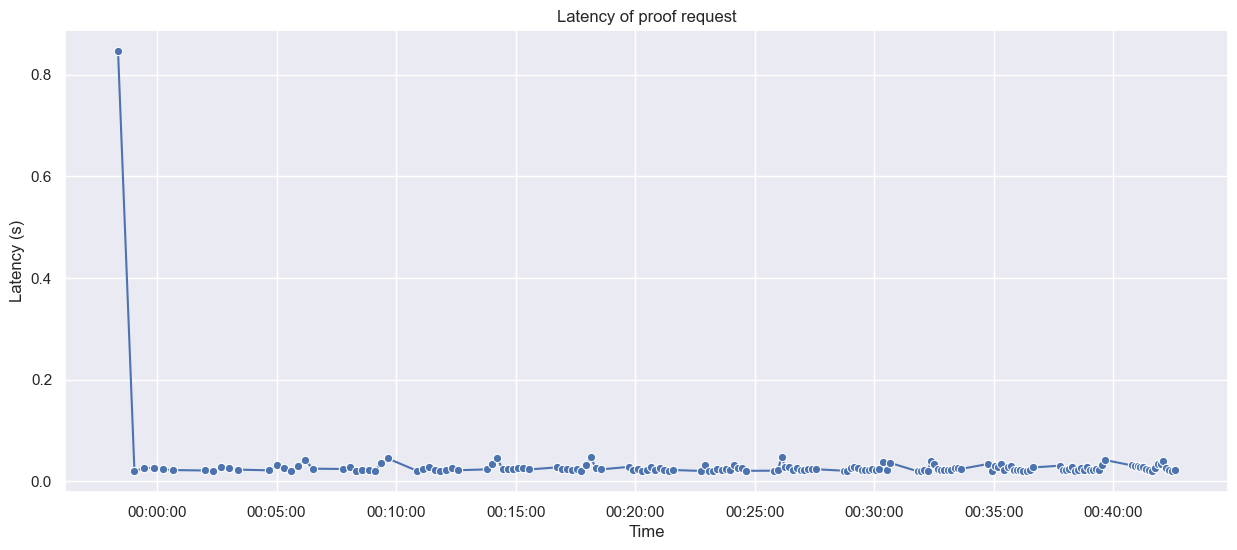

In [24]:
df9 = pd.read_csv('Proof/20240728_215740_result.csv')
df9['DATE_TIME'] = pd.to_datetime(df9['TIMESTAMP'], unit='s').sub(pd.Timedelta(hours=21.1))

sns.set_theme(rc={'figure.figsize':(15,6)})
plot = sns.lineplot(data=df9.loc[::60], x='DATE_TIME', y='DURATION', marker='o')
plot.set_title('Latency of proof request')
plot.set_xlabel('Time')
plot.set_ylabel('Latency (s)')
plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))